In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [10, 8]

In [2]:
def reset():
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

L = 10

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 10

# The grid spacing is L/n

# The number of iterations
nsteps = 10

# Initialize the grid to 0
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
reset()

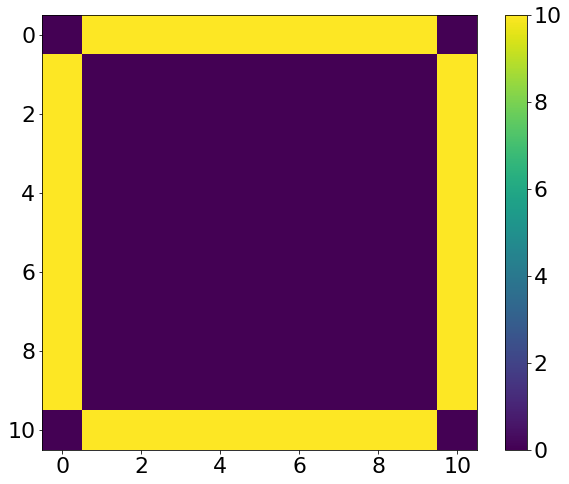

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 1

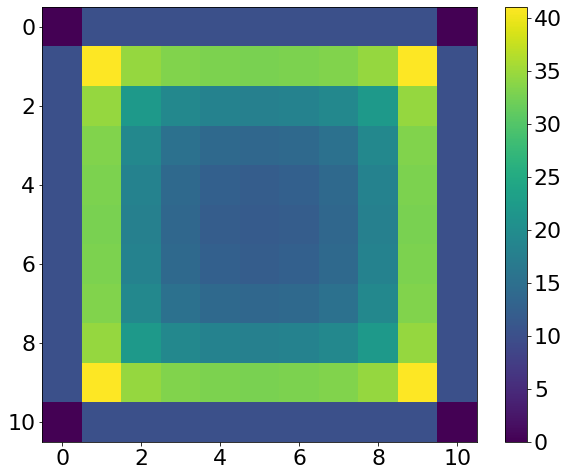

In [4]:
## Exact answer (though it was charges, not potential)
K = 1

def chrg(x,y):
    sum = 0
    for i in range(1,n):
        # Sum the contribution from each point charge along the border
        sum += v[0,i] / ((x - 0)**2 + (y - i)**2)
        sum += v[n,i] / ((x - n)**2 + (y - i)**2)
        sum += v[i,0] / ((x - i)**2 + (y - 0)**2)
        sum += v[i,n] / ((x - i)**2 + (y - n)**2)
    
    return K * sum

vexact = v.copy()
for x in range(1, n):
    for y in range(1,n):
        vexact[x][y] = chrg(x,y)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
im2 = ax2.imshow(vexact, cmap=None, interpolation='nearest')
fig2.colorbar(im2, ax=ax2)
fig2.patch.set_facecolor('xkcd:white')

In [4]:
# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def update(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax(n, v, checker)

    im.set_array(v)
    return im,

In [6]:
# we generate nsteps+1 frames, because frame=0 is skipped (see above)
anim = animation.FuncAnimation(fig, update, frames=nsteps+1, interval=200, blit=True, repeat=False)

In [5]:
def a(vexact):
    global v, n
    def interate(steps):
        reset()
        for i in range(steps):
            update(i)

    #vexact = np.full((n+1,n+1), 10*0.9)
    # remove boundaries
    vexact = np.delete(vexact, [0, n], 1)
    vexact = np.delete(vexact, [0, n], 0)
    tol = 0.01

    L = 0
    R = 1500
    while L < R:
        m = int((L+R)/2)
        interate(m) ## 55 ish
        v = np.delete(v, [0, n], 1)
        v = np.delete(v, [0, n], 0)
        accuracy = np.max((vexact-v)/vexact)
        #print((vexact[5][5]-v[5][5])/vexact[5][5],v[5][5], accuracy)
        #print(accuracy)

        if accuracy < tol:
            R = m - 1
        elif accuracy > tol:
            L = m + 1
        else:
            return m
        
    print(f"Iterations needed: {m} with gridsize: {n}, accuracy: {accuracy}")
        


In [6]:
a(np.full((n+1,n+1), 10*0.9))
n = n*2
a(np.full((n+1,n+1), 10*0.9))
n = int(n/2)

Iterations needed: 54 with gridsize: 10, accuracy: 0.012783030716680422
Iterations needed: 219 with gridsize: 20, accuracy: 0.009377194417346068


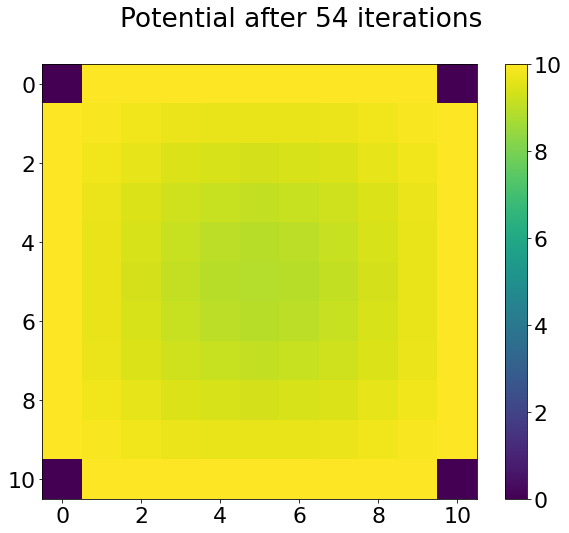

In [13]:
# Show the potential
reset()
for i in range(54):
    update(i)
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.suptitle("Potential after 54 iterations")
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

In [58]:
def b_anim():
    global v
    reset()
    v[n//2, n//2] = 4
    anim = animation.FuncAnimation(fig, update, frames=nsteps+1+500, interval=200, blit=True, repeat=False)

    return anim

def b(vexact, logprint=True):
    global v, n
    def interate(steps):
        reset()
        v[n//2, n//2] = 4 ## add the potential 4 in the middle
        for i in range(steps):
            update(i)

    reset()

    #vexact = np.full((n+1,n+1), 10*0.9)
    # remove boundaries
    vexact = np.delete(vexact, [0, n], 1)
    vexact = np.delete(vexact, [0, n], 0)
    tol = 0.01

    L = 0
    R = 1000
    while L < R:
        m = int((L+R)/2)
        interate(m) ## 55 ish
        v = np.delete(v, [0, n], 1)
        v = np.delete(v, [0, n], 0)
        accuracy = np.max((vexact-v)/vexact)
        #print((vexact[5][5]-v[5][5])/vexact[5][5],v[5][5], accuracy)
        #print(accuracy)

        if accuracy < tol:
            R = m - 1
        elif accuracy > tol:
            L = m + 1
        else:
            return m
    if logprint:   
        print(f"Iterations needed: {m} with gridsize: {n}, accuracy: {accuracy}")
    return m
    

In [59]:
#Good initial guess
b(np.full((n+1,n+1), 10*0.9))
n = n*2
b(np.full((n+1,n+1), 10*0.9))
n = int(n/2)

Iterations needed: 55 with gridsize: 10, accuracy: 0.004501549307911369
Iterations needed: 219 with gridsize: 20, accuracy: 0.008780149525197345


C:\Users\Simon\AppData\Local\Temp/ipykernel_15932/3812852094.py:32: RuntimeWarning: divide by zero encountered in true_divide
  accuracy = np.max((vexact-v)/vexact)


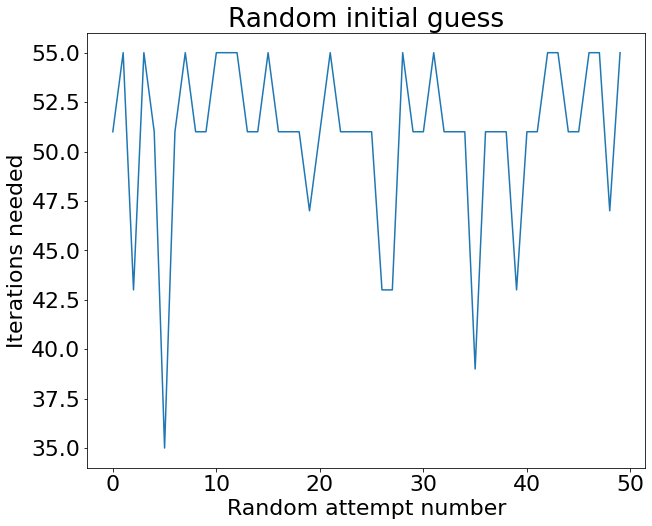

In [65]:
# Poor initial guess
iterations_needed = []

for i in range(50):
    reset()
    poor = v.copy()
    poor[1:-1, 1:-1] = np.array([[np.random.randint(0,10) for j in range(n-1)] for i in range(n-1)])
    iterations_needed.append(b(poor, False))

plt.figure()
plt.title("Random initial guess")
plt.xlabel("Random attempt number")
plt.ylabel("Iterations needed")
plt.plot(range(50), iterations_needed)

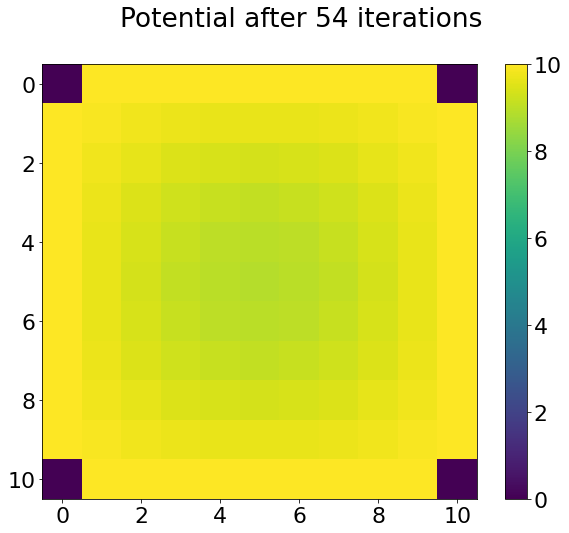

In [16]:
# Show the potential
reset()
v[n//2, n//2] = 4 ## add the potential 4 in the middle
for i in range(54):
    update(i)
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.suptitle("Potential after 54 iterations")
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

In [66]:
def c_helper(vexact, reset):
    global v, n
    def interate(steps):
        reset()
        for i in range(steps):
            update(i)

    reset()

    #vexact = np.full((n+1,n+1), 10*0.9)
    # remove boundaries
    vexact = np.delete(vexact, [0, n], 1)
    vexact = np.delete(vexact, [0, n], 0)
    tol = 0.01

    L = 0
    R = 1000
    while L < R:
        m = int((L+R)/2)
        interate(m) ## 55 ish
        v = np.delete(v, [0, n], 1)
        v = np.delete(v, [0, n], 0)
        accuracy = np.max((vexact-v)/vexact)
        #print((vexact[5][5]-v[5][5])/vexact[5][5],v[5][5], accuracy)
        #print(accuracy)

        if accuracy < tol:
            R = m - 1
        elif accuracy > tol:
            L = m + 1
        else:
            return m
        
    print(f"Iterations needed: {m} with gridsize: {n}, accuracy: {accuracy}")
    return m

def c_1(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 5
        v[i,n] = 5

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None)
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')
    
def c_2(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 0
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None)
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')
    


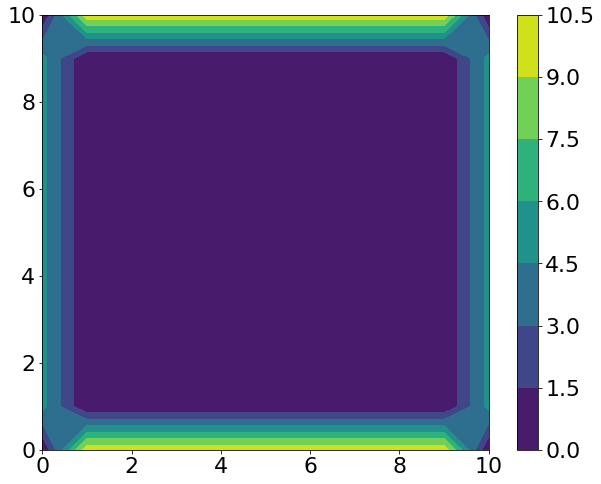

In [67]:
c_1()

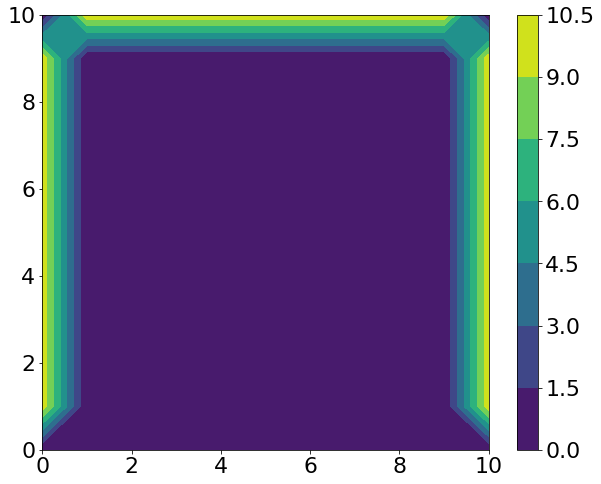

In [68]:
c_2()

Iterations needed: 102 with gridsize: 10, accuracy: 0.010027679849771341
Iterations needed: 106 with gridsize: 10, accuracy: 0.009463492222780322


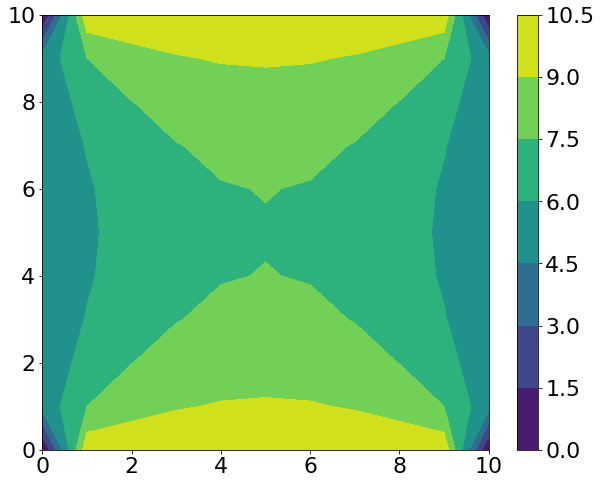

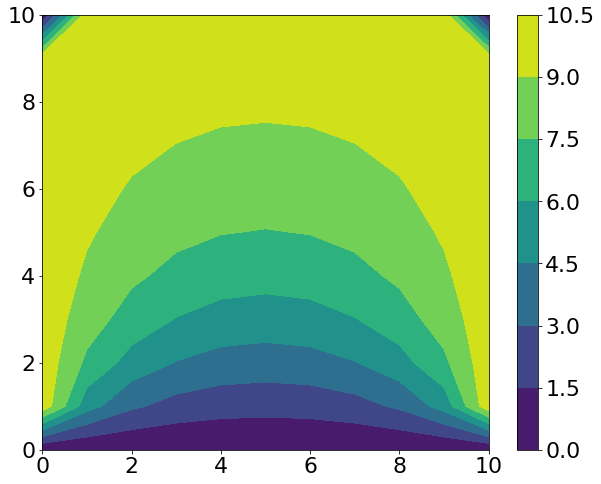

In [69]:
c_1(False)
for i in range(5000):
    update(i)
vexact1 = v.copy()

c_2(False)
for i in range(5000):
    update(i)
vexact2 = v.copy()

m1 = c_helper(vexact1, lambda : c_1(False))
m2 = c_helper(vexact2, lambda : c_2(False))

c_1(False)
for i in range(m1):
    update(i)
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None)
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

c_2(False)
for i in range(m2):
    update(i)
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None)
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')